In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (10,5)

In [2]:
df_picks = pd.read_csv("summary/picks_2022.csv", index_col=0)
# df_results = pd.read_csv("summary/results_2022.csv", index_col=0)

In [3]:
df_picks.shape

(5, 39)

In [4]:
df_picks.head()

,Darren Harris - 1,Darren Harris - 2,Alex Maund - 3,Alex More - 4,Blayre Woolsey - 5,Bob Woolsey Sr - 6,Brad Cleeve 1 - 7,Brad Cleeve 2 - 8,Brendan Close - 9,Cameron Harris - 10,...,Ryan Man - 30,Ryan Man 2 - 31,Scott Guilcher - 32,Sherrey Harris - 33,Thomas Crummell - 34,Thomas Crummell - 35,Chris Dilger - 36,Dan Bzdziuch - 37,Neil Spenceley - 38,Samantha Harris - 39
rd1_selections,"['NSH', 'MIN', 'DAL', 'EDM', 'FLA', 'TBL', 'CA...","['COL', 'STL', 'CGY', 'EDM', 'FLA', 'TBL', 'BO...","['COL', 'STL', 'CGY', 'EDM', 'FLA', 'TBL', 'CA...","['COL', 'STL', 'CGY', 'LAK', 'FLA', 'TOR', 'CA...","['COL', 'MIN', 'CGY', 'EDM', 'WSH', 'TOR', 'BO...","['COL', 'MIN', 'CGY', 'EDM', 'FLA', 'TOR', 'BO...","['COL', 'MIN', 'CGY', 'EDM', 'FLA', 'TOR', 'CA...","['COL', 'MIN', 'CGY', 'EDM', 'FLA', 'TBL', 'BO...","['COL', 'MIN', 'CGY', 'LAK', 'FLA', 'TBL', 'BO...","['COL', 'MIN', 'CGY', 'EDM', 'WSH', 'TOR', 'CA...",...,"['COL', 'MIN', 'CGY', 'EDM', 'FLA', 'TBL', 'CA...","['COL', 'STL', 'CGY', 'EDM', 'FLA', 'TBL', 'BO...","['COL', 'MIN', 'CGY', 'EDM', 'FLA', 'TBL', 'BO...","['COL', 'MIN', 'CGY', 'LAK', 'FLA', 'TBL', 'CA...","['COL', 'STL', 'CGY', 'LAK', 'FLA', 'TBL', 'CA...","['COL', 'MIN', 'CGY', 'EDM', 'FLA', 'TOR', 'CA...","['COL', 'MIN', 'CGY', 'EDM', 'FLA', 'TBL', 'CA...","['COL', 'STL', 'CGY', 'EDM', 'FLA', 'TBL', 'CA...","['COL', 'MIN', 'CGY', 'EDM', 'FLA', 'TBL', 'CA...","['COL', 'STL', 'CGY', 'EDM', 'FLA', 'TBL', 'BO..."
rd2_selections,"['MIN', 'EDM', 'TBL', 'CAR']","['STL', 'EDM', 'TBL', 'BOS']","['COL', 'CGY', 'FLA', 'CAR']","['STL', 'CGY', 'TOR', 'CAR']","['COL', 'CGY', 'WSH', 'PIT']","['MIN', 'CGY', 'TOR', 'NYR']","['COL', 'CGY', 'FLA', 'NYR']","['COL', 'EDM', 'FLA', 'PIT']","['COL', 'CGY', 'FLA', 'NYR']","['MIN', 'CGY', 'TOR', 'CAR']",...,"['COL', 'CGY', 'FLA', 'NYR']","['COL', 'CGY', 'FLA', 'BOS']","['COL', 'CGY', 'TBL', 'BOS']","['COL', 'CGY', 'FLA', 'PIT']","['COL', 'LAK', 'TBL', 'CAR']","['COL', 'CGY', 'FLA', 'CAR']","['COL', 'CGY', 'TBL', 'CAR']","['STL', 'CGY', 'TBL', 'NYR']","['COL', 'CGY', 'FLA', 'NYR']","['COL', 'CGY', 'TBL', 'BOS']"
rd3_selections,"['EDM', 'TBL']","['STL', 'TBL']","['COL', 'FLA']","['CGY', 'CAR']","['COL', 'WSH']","['CGY', 'TOR']","['COL', 'FLA']","['COL', 'FLA']","['COL', 'FLA']","['MIN', 'CAR']",...,"['COL', 'FLA']","['CGY', 'FLA']","['CGY', 'BOS']","['COL', 'FLA']","['COL', 'CAR']","['COL', 'FLA']","['COL', 'TBL']","['CGY', 'TBL']","['CGY', 'FLA']","['COL', 'TBL']"
rd4_selections,['EDM'],['TBL'],['COL'],['CGY'],['COL'],['TOR'],['COL'],['FLA'],['FLA'],['MIN'],...,['COL'],['FLA'],['CGY'],['COL'],['CAR'],['COL'],['COL'],['CGY'],['CGY'],['COL']
tie_breaker,['Mcdavid'],['Kucherov'],['Barkov'],['Johnny Gaudreau'],['Nathan MacKinnon'],['Nylander'],['Nathan MacKinnon'],['Jonathan Huberdeau'],['Huberdeau'],['Kaprizov'],...,['Mikko Rantanen'],['Jon Huberdeau'],['\nMatthew Tkachuk'],['MacKinnon'],['Sebastian Aho '],['Mackinnon'],['Nathan McKinnon'],['J. Gaudreu'],['Johnathan Huberdeau'],['Nathan MacKinnon']


In [5]:
df_picks.iloc[0,0]

"['NSH', 'MIN', 'DAL', 'EDM', 'FLA', 'TBL', 'CAR', 'PIT']"

In [6]:
# count picks in first round
pick_counter = {}
    
def count_picks(picks_round):
    rd = picks_round.name
    pick_counter[rd] = {}
    for persons_picks in picks_round:
        for pick in ast.literal_eval(persons_picks):
            if pick in pick_counter[rd].keys():
                pick_counter[rd][pick]+=1
            else:
                pick_counter[rd][pick]=1
    return pick_counter

pick_summary = df_picks.apply(count_picks, axis=1).rd1_selections

In [7]:
pick_summary['rd1_selections']

{'NSH': 2,
 'MIN': 28,
 'DAL': 2,
 'EDM': 34,
 'FLA': 35,
 'TBL': 21,
 'CAR': 17,
 'PIT': 19,
 'COL': 37,
 'STL': 11,
 'CGY': 37,
 'BOS': 22,
 'NYR': 20,
 'LAK': 5,
 'TOR': 18,
 'WSH': 4}

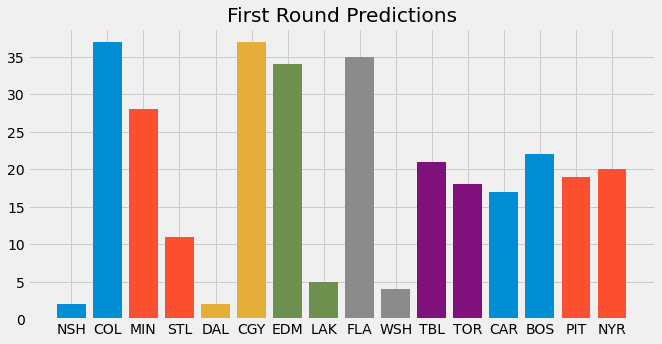

In [8]:
rd1_matchups = {
    1 : ('NSH', 'COL'),
    2 : ('MIN','STL'),
    3 : ('DAL', 'CGY'),
    4 : ('EDM', 'LAK'),
    5 : ('FLA', 'WSH'),
    6 : ('TBL', 'TOR'),
    7 : ('CAR', 'BOS'),
    8 : ('PIT', 'NYR'),

}

for k, v in rd1_matchups.items():
    plt.bar(x=[v[0], v[1]],
            height=[pick_summary['rd1_selections'][v[0]], pick_summary['rd1_selections'][v[1]]])
    plt.title("First Round Predictions")

plt.savefig('img/rd1_pred.png');

In [9]:
pick_summary['rd2_selections']

{'MIN': 9,
 'EDM': 11,
 'TBL': 8,
 'CAR': 11,
 'STL': 3,
 'BOS': 16,
 'COL': 27,
 'CGY': 26,
 'FLA': 20,
 'TOR': 9,
 'WSH': 2,
 'PIT': 4,
 'NYR': 8,
 'DAL': 1,
 'LAK': 1}

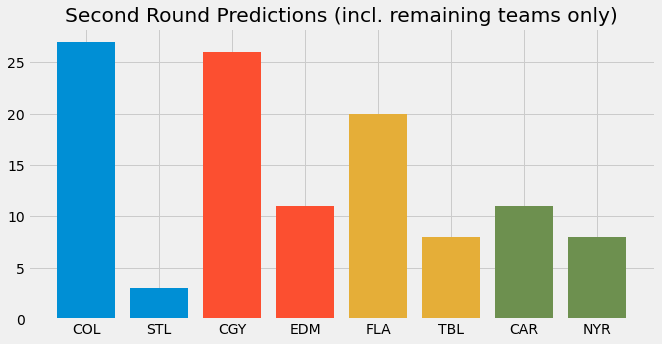

In [10]:
rd2_matchups = {
    1 : ('COL', 'STL'),
    2 : ('CGY','EDM'),
    3 : ('FLA', 'TBL'),
    4 : ('CAR', 'NYR')
}

for k, v in rd2_matchups.items():
    plt.bar(x=[v[0], v[1]],
            height=[pick_summary['rd2_selections'][v[0]], pick_summary['rd2_selections'][v[1]]])
    plt.title("Second Round Predictions (incl. remaining teams only)")

plt.savefig('img/rd2_pred.png');

In [30]:
pick_summary['rd3_selections']['NYR'] = 0

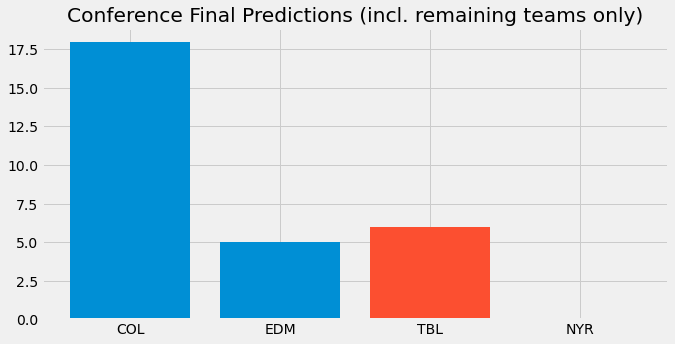

In [31]:
rd3_matchups = {
    1 : ('COL', 'EDM'),
    2 : ('TBL','NYR'),
}

for k, v in rd3_matchups.items():
    plt.bar(x=[v[0], v[1]],
            height=[pick_summary['rd3_selections'][v[0]], pick_summary['rd3_selections'][v[1]]])
    plt.title("Conference Final Predictions (incl. remaining teams only)")

plt.savefig('img/rd3_pred.png');

In [12]:
c = ['midnightblue', 'c', 'maroon', 'orangered', 'b', 'red', 'g', 'k']

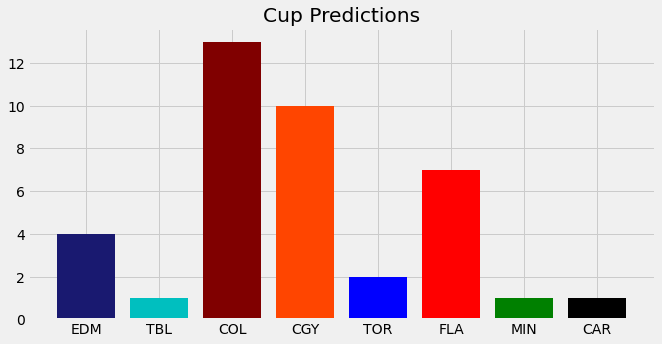

In [138]:
plt.bar(x=pick_summary['rd4_selections'].keys(), height=pick_summary['rd4_selections'].values(), color=c)
plt.title('Cup Predictions')
plt.savefig('img/cup_pred.png');

In [11]:
# df_results.sort_values(by='total_points', ascending=False)

In [12]:
# df_results.style.highlight_max(subset='total_points')

In [13]:
# Save png of results df
# dfi.export(df_results, "points.png")